In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
import warnings
from scipy.stats import kstest
import scipy.stats as stats

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
warnings.simplefilter('ignore')

# Data reading and filtering

In [2]:
data = pd.read_csv("../summary_data/sbt_features_oncopanel.csv")
data = data.set_index('Sample ID')

data = data.loc[data['Primary Cancer Diagnosis'] == 'Lung Adenocarcinoma', ]
data = data.loc[~data['Oncotree Biopsy Site'].isna()]


data = data.loc[data['Tumor Purity'] > 0]
data = data.loc[data['offcov'] <= 0.5]

data = data.rename(columns={"Age at Sequencing":"Age"})
data = data.loc[data['Age'] > 0]

data['Sex'] = data['Sex'] == "Female"
data['Sex'] = data['Sex'].astype(int)

data['Panel Version'] = data['Panel Version'].astype(float)

data['Panel_Version_1'] = data['Panel Version'] == 1.0
data['Panel_Version_1'] = data['Panel_Version_1'].astype(float)

data['Panel_Version_2'] = data['Panel Version'] == 2.0
data['Panel_Version_2'] = data['Panel_Version_2'].astype(float)

data['LUNG'] = data['Oncotree Biopsy Site'] == "LUNG"
data['LUNG'] = data['LUNG'].astype(int)

data['LYMPH'] = data['Oncotree Biopsy Site'] == "LYMPH"
data['LYMPH'] = data['LYMPH'].astype(int)

data['PLEURA'] = data['Oncotree Biopsy Site'] == "PLEURA"
data['PLEURA'] = data['PLEURA'].astype(int)

data['BRAIN'] = data['Oncotree Biopsy Site'] == "BRAIN"
data['BRAIN'] = data['BRAIN'].astype(int)

data.shape

(2120, 89)

# Dictionary of feature names

In [3]:
feature_dict_names = {'mtDNA_dosage_norm':'mtDNA copy number', '5S_dosage_norm':'5S rDNA copy number', 
                      '18S_dosage_norm':'18S rDNA copy number', '28S_dosage_norm':'28S rDNA copy number', 
                      '45S_dosage_norm':'45S rDNA copy number', 'n_fungi_norm':'fungal load', 
                      'n_microbial_norm':'microbial load', 'n_protozoa_norm':'protozoa load', 
                      'n_viral_norm':'viral load', 'loadIG_ligth_chain_norm':'IG κ and λ infiltration', 
                      'loadIG_norm':'BCR infiltration', 'loadIGH_norm':'IGH infiltration', 
                      'loadIGK_norm':'IG κ infiltration', 'loadIGL_norm':'IG λ infiltration', 
                      'loadTCR_norm':'T cell infiltration', 'loadTCRA_norm':'T cell α infiltration', 
                      'loadTCRB_norm':'T cell β infiltration', 'loadTCRD_norm':'T cell δ infiltration',
                      'loadTCRG_norm':'T cell γ infiltration', 'nIG_ligth_chain_norm':'IG κ and λ richness', 
                      'nIG_norm':'BCR richness', 'nIGH_norm':'IGH richness', 'nIGK_norm':'IG κ richness', 
                      'nIGL_norm':'IG λ richness', 'nTCR_norm':'TCR richness', 'nTCRA_norm':'TCR α richness', 
                      'nTCRB_norm':'TCR β richness', 'nTCRD_norm':'TCR δ richness', 'nTCRG_norm':'TCR γ richness',
                      'alphaIGH':'IGH Shannon', 'alphaIGK':'IG κ Shannon', 'alphaIGL':'IG λ Shannon', 
                      'alphaTCRA':'TCR α Shannon', 'alphaTCRB':'TCR β Shannon', 'alphaTCRD':'TCR δ Shannon', 
                      'alphaTCRG':'TCR γ Shannon'}

# Covariates and outcomes

In [4]:

covariates = ['Panel_Version_1', 'Panel_Version_2', 'offcov', 'Tumor Purity']

outcomes = ['Sex', 'TP53', 'EGFR', 'KRAS', "LUNG", "LYMPH", "PLEURA", "BRAIN", 'Age', 'TMB']



# Distribution of covariates


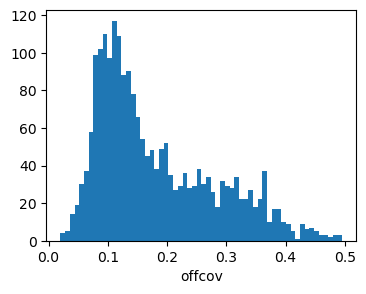

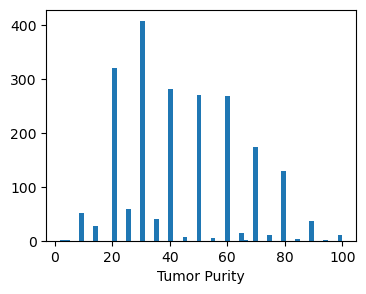

In [5]:
for column in covariates[2:]:
    
    plt.hist(data[column], bins=60)
    plt.xlabel(column)
    plt.show()

# Distribution of Outcomes


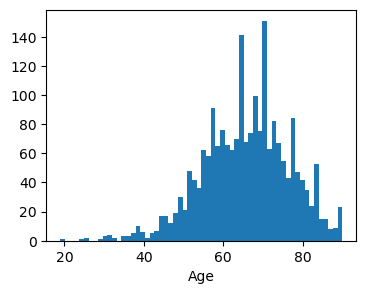

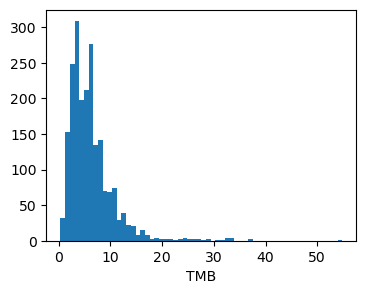

In [6]:
for column in outcomes[8:]:
      
    plt.hist(data[column], bins=60)
    plt.xlabel(column)
    plt.show()

# Standardization of TMB

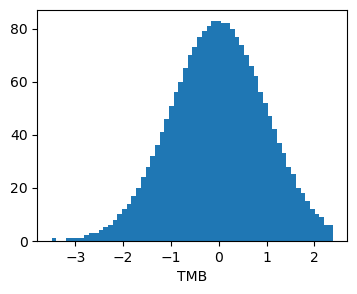

In [7]:
for column in ['TMB']:
    
    column_data = data[column]  

    column_data = column_data.rank(method='first').reindex_like(column_data)

    for row in column_data.index: 
        x = norm.ppf((column_data[row]-0.5)/len(column_data))
        data[column][row] = x    


    plt.hist(data[column], bins=60)
    plt.xlabel(column)
    plt.show()

# Zero inflated SBT features ( >10%)

loadIG_ligth_chain_norm  - zero portion:  77.73584905660378 %  - nonzero inviduals:  472


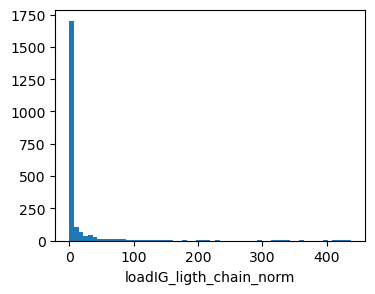

loadIG_norm  - zero portion:  72.87735849056604 %  - nonzero inviduals:  575


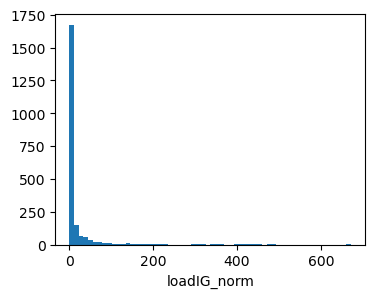

loadIGH_norm  - zero portion:  86.88679245283019 %  - nonzero inviduals:  278


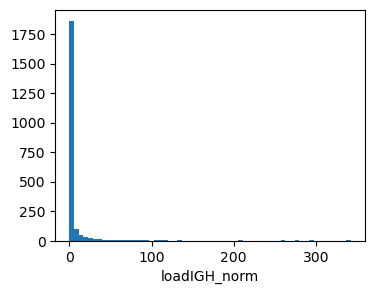

loadIGK_norm  - zero portion:  99.81132075471699 %  - nonzero inviduals:  4


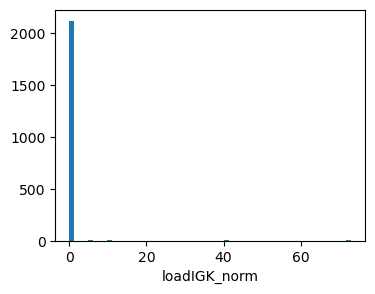

loadIGL_norm  - zero portion:  77.78301886792453 %  - nonzero inviduals:  471


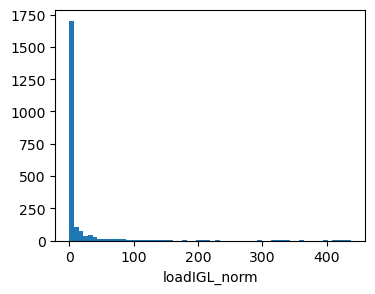

loadTCR_norm  - zero portion:  29.198113207547173 %  - nonzero inviduals:  1501


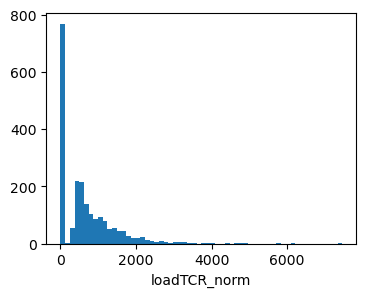

loadTCRA_norm  - zero portion:  29.198113207547173 %  - nonzero inviduals:  1501


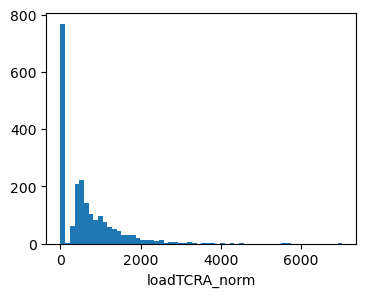

loadTCRB_norm  - zero portion:  52.68867924528302 %  - nonzero inviduals:  1003


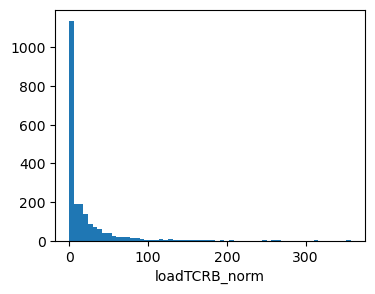

loadTCRD_norm  - zero portion:  99.5754716981132 %  - nonzero inviduals:  9


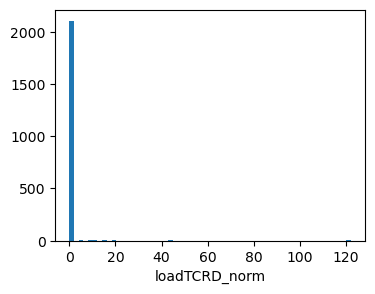

loadTCRG_norm  - zero portion:  55.5188679245283 %  - nonzero inviduals:  943


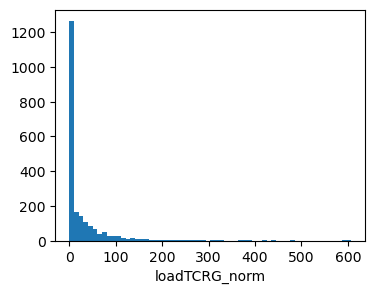

nIG_ligth_chain_norm  - zero portion:  77.73584905660378 %  - nonzero inviduals:  472


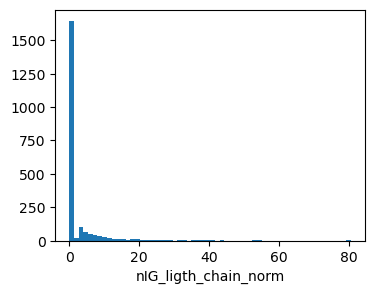

nIG_norm  - zero portion:  72.87735849056604 %  - nonzero inviduals:  575


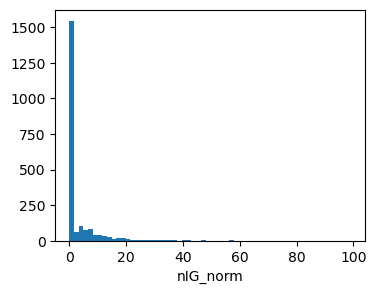

nIGH_norm  - zero portion:  86.88679245283019 %  - nonzero inviduals:  278


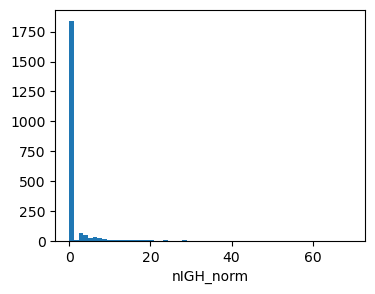

nIGK_norm  - zero portion:  99.81132075471699 %  - nonzero inviduals:  4


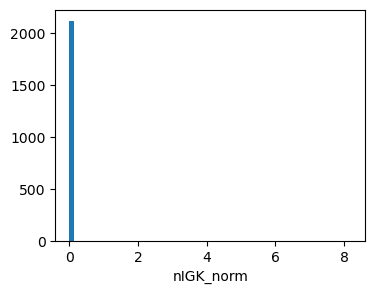

nIGL_norm  - zero portion:  77.78301886792453 %  - nonzero inviduals:  471


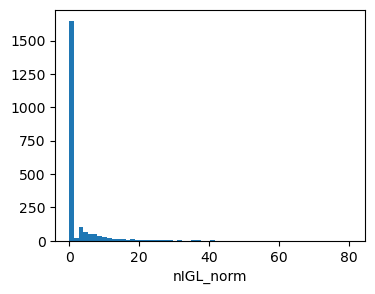

nTCR_norm  - zero portion:  29.198113207547173 %  - nonzero inviduals:  1501


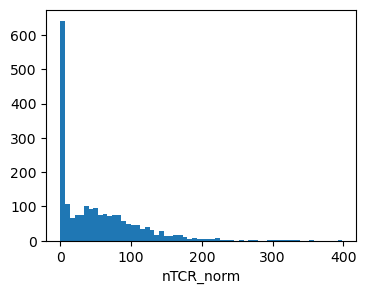

nTCRA_norm  - zero portion:  29.198113207547173 %  - nonzero inviduals:  1501


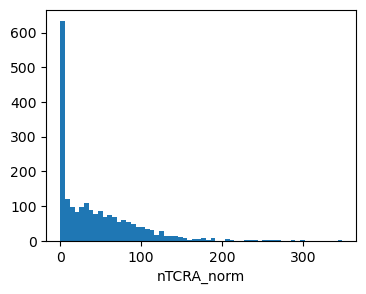

nTCRB_norm  - zero portion:  52.68867924528302 %  - nonzero inviduals:  1003


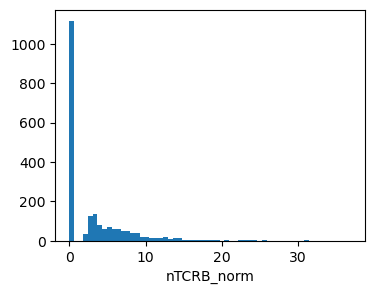

nTCRD_norm  - zero portion:  99.5754716981132 %  - nonzero inviduals:  9


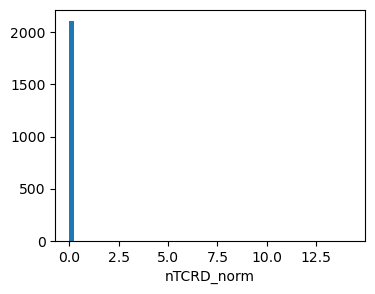

nTCRG_norm  - zero portion:  55.5188679245283 %  - nonzero inviduals:  943


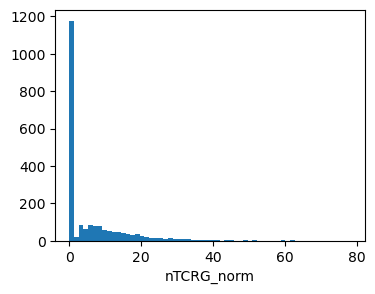

alphaIGH  - zero portion:  95.37735849056604 %  - nonzero inviduals:  98


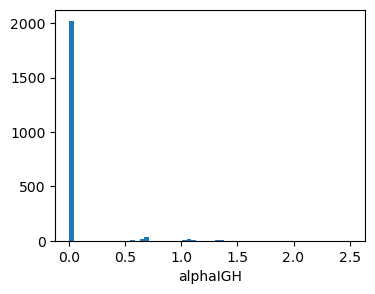

alphaIGK  - zero portion:  100.0 %  - nonzero inviduals:  0


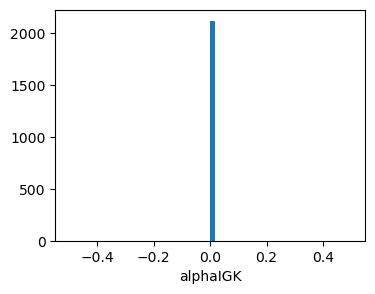

alphaIGL  - zero portion:  90.28301886792453 %  - nonzero inviduals:  206


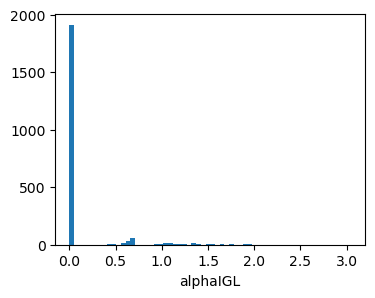

alphaTCRA  - zero portion:  34.95283018867924 %  - nonzero inviduals:  1379


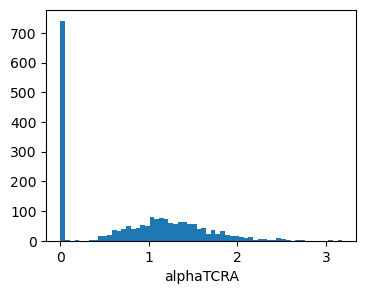

alphaTCRB  - zero portion:  89.29245283018868 %  - nonzero inviduals:  227


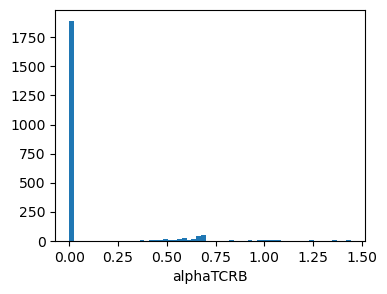

alphaTCRD  - zero portion:  99.95283018867924 %  - nonzero inviduals:  1


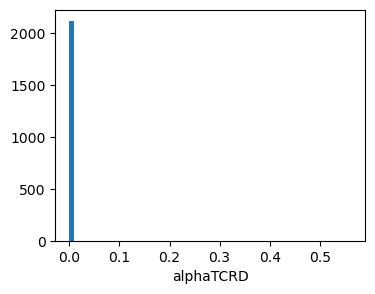

alphaTCRG  - zero portion:  70.18867924528301 %  - nonzero inviduals:  632


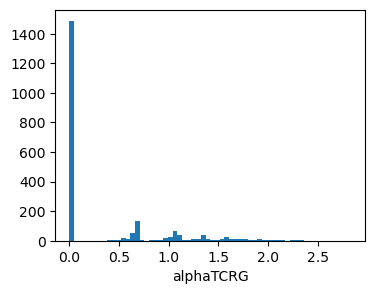

In [8]:
features_zero_inflated_ = ['loadIG_ligth_chain_norm','loadIG_norm','loadIGH_norm','loadIGK_norm','loadIGL_norm',
                           'loadTCR_norm','loadTCRA_norm','loadTCRB_norm','loadTCRD_norm','loadTCRG_norm',
                           'nIG_ligth_chain_norm', 'nIG_norm','nIGH_norm','nIGK_norm','nIGL_norm',
                           'nTCR_norm','nTCRA_norm','nTCRB_norm','nTCRD_norm','nTCRG_norm',
                           'alphaIGH', 'alphaIGK','alphaIGL',
                           'alphaTCRA','alphaTCRB','alphaTCRD','alphaTCRG']

features_zero_inflated = []

# number of rows
N = data.shape[0]

for feature in features_zero_inflated_:
   
    # number of zeros
    n_zeros = len(data.loc[data[feature] == 0, feature])
    
    # features and portion of zeros
    print(feature, " - zero portion: ", n_zeros/N*100, "%"," - nonzero inviduals: " , N - n_zeros)
    
    if N - n_zeros > 30:
        features_zero_inflated.append(feature)
    
    plt.hist(data[feature], bins=60)
    plt.xlabel(feature)
    plt.show()
    

data_zero_inflated = data[features_zero_inflated]

## Inverse normal transformation: qnorm((rank(x,na.last="keep")-0.5)/sum(!is.na(x)))

In [9]:
data_zero_inflated_Q = data_zero_inflated.copy()

for feature in features_zero_inflated:
    
    data_feature = data_zero_inflated.loc[data_zero_inflated[feature] != 0., feature]

    data_feature = data_feature.rank(method='first').reindex_like(data_feature)

    for row in data_feature.index: 

        x = norm.ppf((data_feature[row]-0.5)/len(data_feature))
        data_zero_inflated_Q[feature][row] = x
        
#renaming columns
for feature in features_zero_inflated:
    data_zero_inflated_Q = data_zero_inflated_Q.rename(columns={feature: feature+"_Q"}, errors="raise")

## Checking new distribution - non-zero values

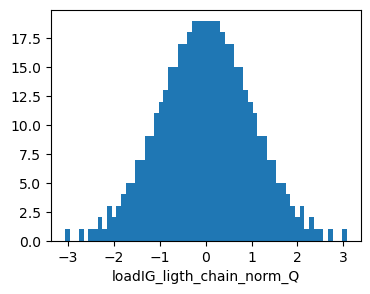

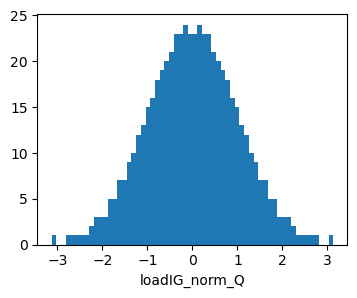

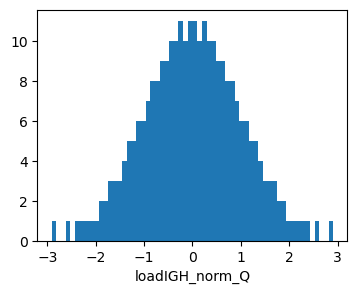

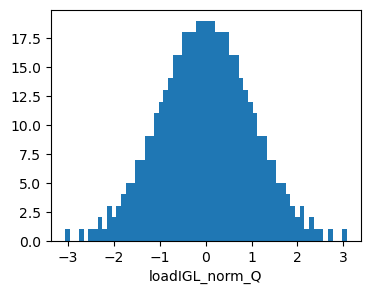

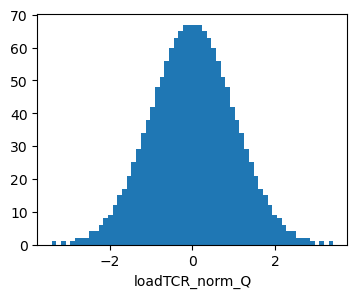

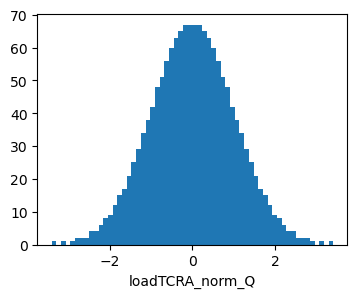

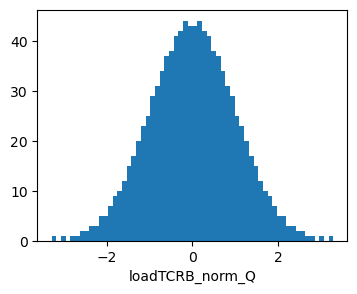

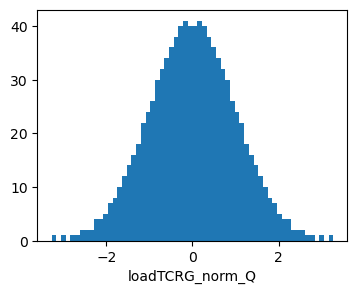

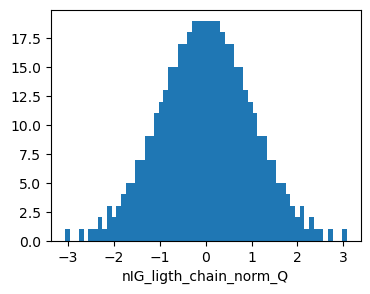

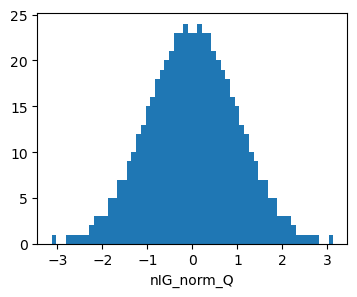

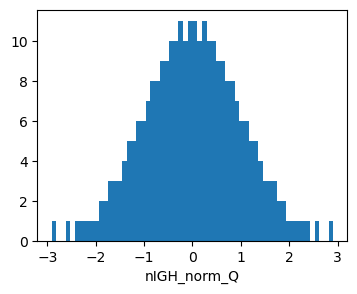

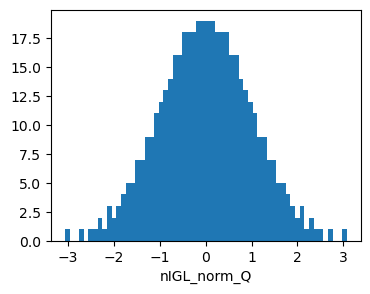

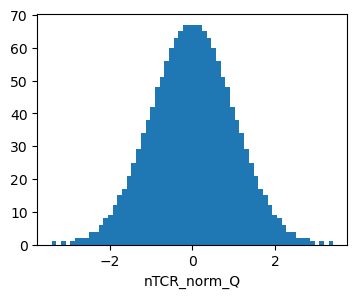

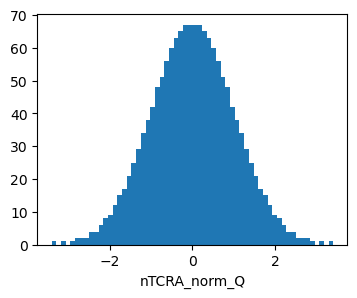

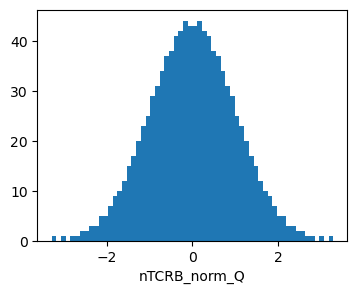

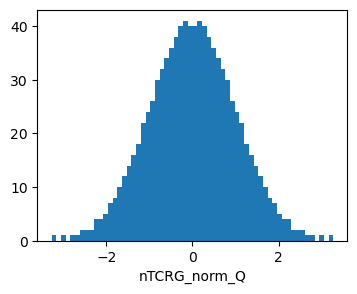

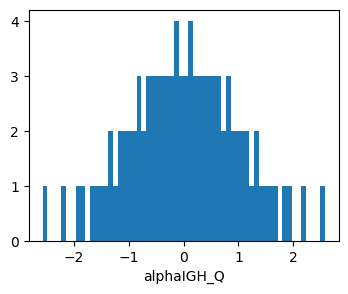

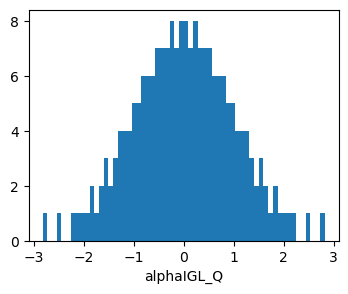

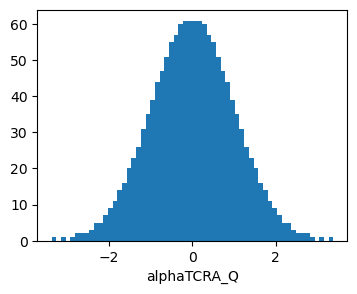

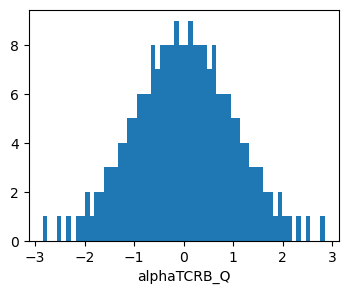

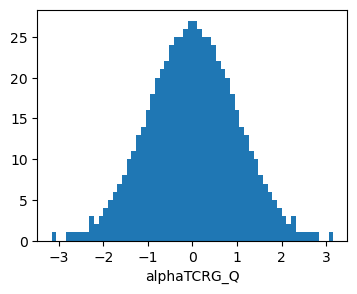

In [10]:
for feature in features_zero_inflated:
    x = data_zero_inflated_Q.loc[data_zero_inflated_Q[feature+"_Q"] != 0, feature+"_Q"]
    plt.hist(x, bins=60)
    plt.xlabel(feature+"_Q")
    plt.show()

## Dichotomous variable with 0 for zero values and 1 otherwise

In [11]:
data_zero_inflated_D = data_zero_inflated.copy()

for feature in features_zero_inflated:
    
    data_zero_inflated_D.loc[data_zero_inflated_D[feature] != 0. , feature] = 1.
    #renaming columns
    data_zero_inflated_D = data_zero_inflated_D.rename(columns={feature: feature+"_D"}, errors="raise")

# Regression

In [12]:
data_ = data.copy()

data_ = data_.join(data_zero_inflated_D, on='Sample ID')
data_ = data_.join(data_zero_inflated_Q, on='Sample ID')
data_['constant'] = 1.

df_ = data_

#Dataframe to store results
col_names =  ['outcome', 'sbt_feature', 'pvalue', 'effect', 'std']
result  = pd.DataFrame(columns = col_names)
    
    
for outcome in outcomes:
        
    for feature in features_zero_inflated:
        
        df = df_[[outcome,'constant', feature+"_Q",  feature+"_D", 
                 'Panel_Version_1', 'Panel_Version_2', 'Tumor Purity', 'offcov']]
        df = df.dropna()
            
        y = df[outcome]
      
        
        # Y ~ v_Q + v_D + Covs
        X = np.array(df[['constant', feature+"_Q", feature+"_D", 
                         'Panel_Version_1', 'Panel_Version_2', 'Tumor Purity', 'offcov']])
               
        model = sm.OLS(y,X)
        results = model.fit()
        L1 = float(results.summary2().tables[0][3][3])
        p_values = results.summary2().tables[1]['P>|t|']
        coefs = results.summary2().tables[1]['Coef.']
        errors = results.summary2().tables[1]['Std.Err.']
        
        effect =  coefs['x1']
        std = errors['x1']
        
        if abs(effect) < abs(coefs['x2']):
            effect =  coefs['x2']
            std = errors['x2']

                  
        # Y ~ Covs
        X = np.array(df[['constant', 'Panel_Version_1', 'Panel_Version_2', 'Tumor Purity', 'offcov']])

        model = sm.OLS(y,X)
        results = model.fit()
        L2 = float(results.summary2().tables[0][3][3])
      
        chi2 = 2*(L1 - L2)        
        pvalue = 1 - stats.chi2.cdf(chi2, 2)
            
        result = result.append({'outcome': outcome, 
                                'sbt_feature': feature_dict_names[feature], 
                                'pvalue': pvalue, 
                                'effect': effect, 
                                'std': std}, 
                                ignore_index=True)

result_zero_inflated = result


# SBT features without zero inflation

mtDNA_dosage_norm  - zero portion:  0.0 %


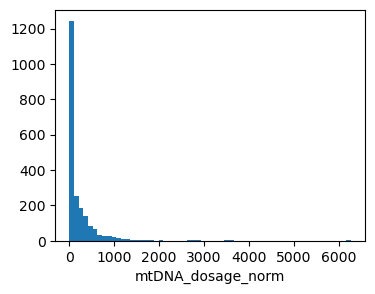

5S_dosage_norm  - zero portion:  0.0 %


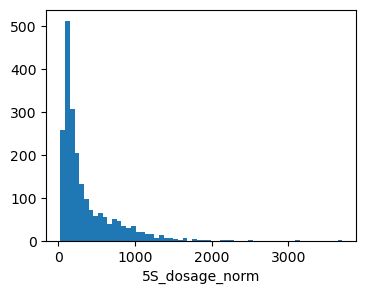

18S_dosage_norm  - zero portion:  2.0754716981132075 %


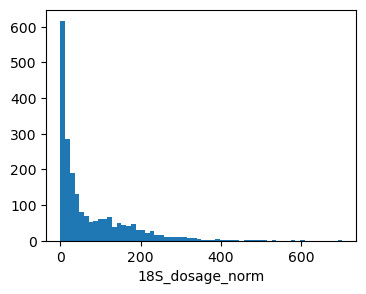

28S_dosage_norm  - zero portion:  0.09433962264150944 %


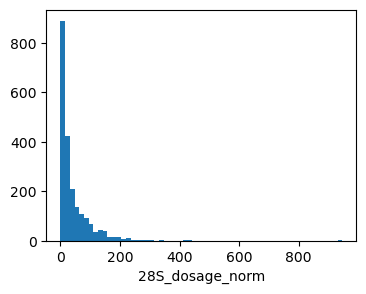

45S_dosage_norm  - zero portion:  0.0 %


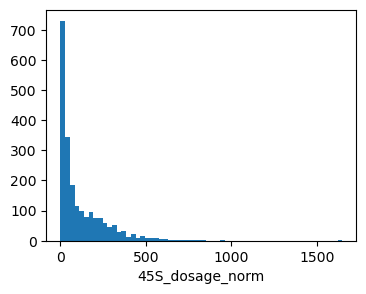

n_fungi_norm  - zero portion:  0.0 %


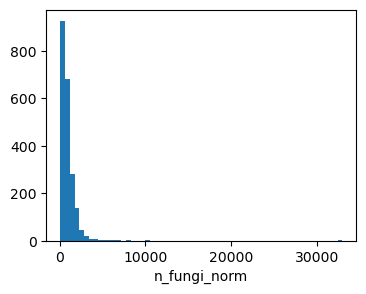

n_microbial_norm  - zero portion:  0.0 %


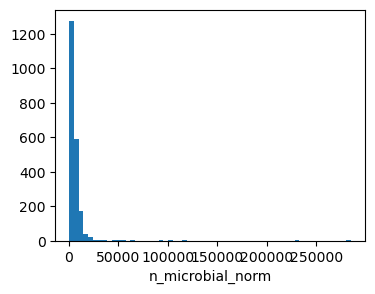

n_protozoa_norm  - zero portion:  0.04716981132075472 %


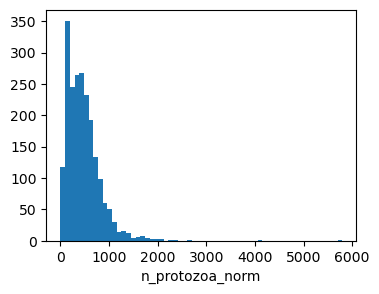

n_viral_norm  - zero portion:  0.0 %


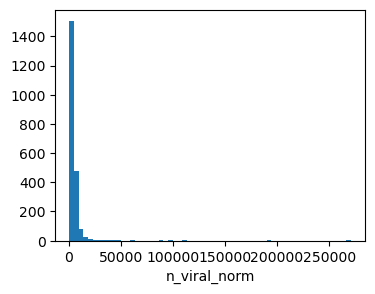

In [13]:
features_non_zero_inflated=['mtDNA_dosage_norm',
                            '5S_dosage_norm','18S_dosage_norm','28S_dosage_norm','45S_dosage_norm',
                            'n_fungi_norm','n_microbial_norm','n_protozoa_norm','n_viral_norm']

# number of rows
N = data.shape[0]

for feature in features_non_zero_inflated:
   
    # number of zeros
    n_zeros = len(data.loc[data[feature] == 0, feature])
    
    # features and portion of zeros
    print(feature, " - zero portion: ", n_zeros/N*100, '%')
    plt.hist(data[feature], bins=60)
    plt.xlabel(feature)
    plt.show()

data_non_zero_inflated = data[features_non_zero_inflated]


## Inverse normal transformation: qnorm((rank(x,na.last="keep")-0.5)/sum(!is.na(x)))

In [14]:
data_non_zero_inflated_Q = data_non_zero_inflated.copy()

for feature in features_non_zero_inflated:
    
    data_feature = data_non_zero_inflated[feature]

    data_feature = data_feature.rank(method='first').reindex_like(data_feature)

    for row in data_feature.index: 

        x = norm.ppf((data_feature[row]-0.5)/len(data_feature))
        data_non_zero_inflated_Q[feature][row] = x
        
#renaming columns
for feature in features_non_zero_inflated:
    data_non_zero_inflated_Q = data_non_zero_inflated_Q.rename(columns={feature: feature+"_Q"}, errors="raise")    

## Checking new distribution 

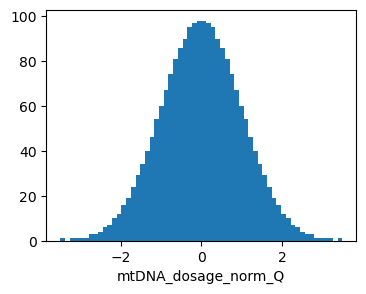

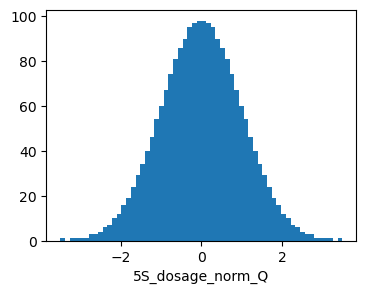

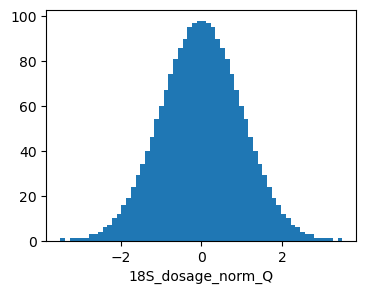

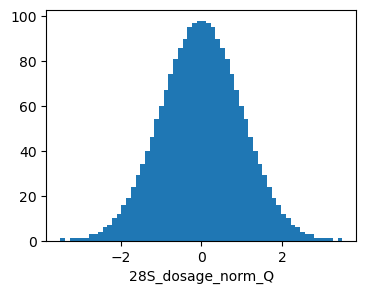

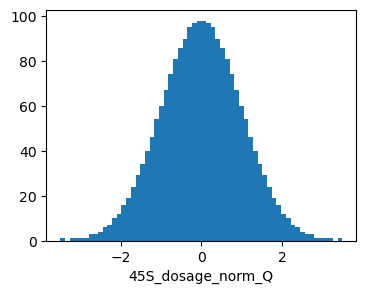

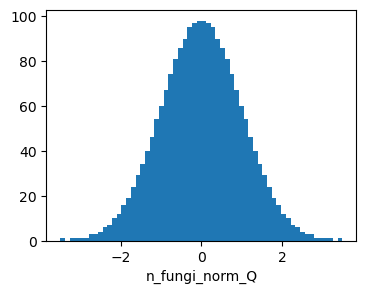

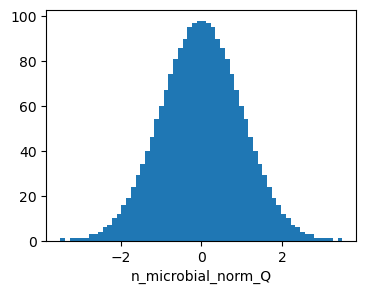

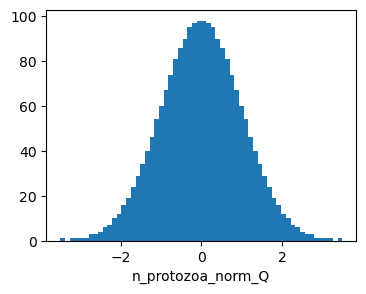

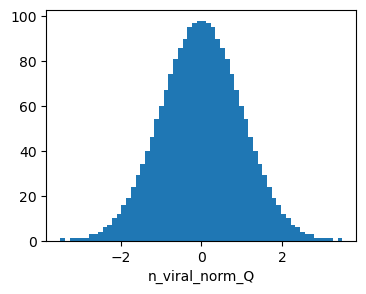

In [15]:
for feature in features_non_zero_inflated:
    
    plt.hist(data_non_zero_inflated_Q[feature+"_Q"], bins=60)
    plt.xlabel(feature+"_Q")
    plt.show()

## Dichotomous variable with 0 for the bottom 85% of data and 1 for the top 15% 

In [16]:
N = data_non_zero_inflated.shape[0]

data_non_zero_inflated_D = data_non_zero_inflated.rank()/N

for feature in features_non_zero_inflated:
    
    data_non_zero_inflated_D.loc[data_non_zero_inflated_D[feature] < 0.85, feature] = 0.
    data_non_zero_inflated_D.loc[data_non_zero_inflated_D[feature] >= 0.85, feature] = 1.
    data_non_zero_inflated_D = data_non_zero_inflated_D.rename(columns={feature: feature+"_D"}, errors="raise")

# Regression

In [17]:
data_ = data.copy()

data_ = data_.join(data_non_zero_inflated_D, on='Sample ID')
data_ = data_.join(data_non_zero_inflated_Q, on='Sample ID')
data_['constant'] = 1.

df_ = data_

#Dataframe to store results
col_names =  ['outcome', 'sbt_feature',  'effect', 'pvalue', 'std']
result  = pd.DataFrame(columns = col_names)
    
    
for outcome in outcomes:
            
    for feature in features_non_zero_inflated:     
        
        df = df_[[outcome, 'constant', feature+"_Q", feature+"_D", 
                  'Panel_Version_1','Panel_Version_2', 'Tumor Purity', 'offcov']]
        df = df.dropna()

        y = df[outcome]
      
        
        # Y ~ Q_v + Covs
        X = np.array(df[['constant', feature+"_Q", 'Panel_Version_1', 'Panel_Version_2', 'Tumor Purity', 'offcov']])
               
        model = sm.OLS(y,X)
        results = model.fit()
        
        p_values_Q = results.summary2().tables[1]['P>|t|']
        coefs_Q = results.summary2().tables[1]['Coef.']
        errors_Q = results.summary2().tables[1]['Std.Err.']

        
        result = result.append({'outcome': outcome, 
                                'sbt_feature': feature_dict_names[feature], 
                                'effect': coefs_Q['x1'], 
                                'pvalue': p_values_Q['x1'], 
                                'std': errors_Q['x1']}, 
                                ignore_index=True)
        
result_non_zero_inflated = result


In [18]:
df = pd.concat([result_non_zero_inflated.loc[ (~result_non_zero_inflated['outcome'].str.contains(".sscore")) ,],
                result_zero_inflated.loc[ (~result_zero_inflated['outcome'].str.contains(".sscore")) ,]])

N = 10

df = df.fillna('-')

df.loc[df['pvalue'] < 0.05, 'label'] = '*'
df.loc[df['pvalue'] < 0.01, 'label'] = '**'
df.loc[df['pvalue'] < 0.05/N, 'label'] = '***'
df.loc[df['pvalue'] >= 0.05, 'label'] = ''

df['z'] = abs(stats.norm.isf(df['pvalue']/2, loc = 0, scale = 1))*df['effect']/abs(df['effect'])

df.to_csv('../summary_data/association_results_op-luad.csv', index=False)

# Fig 1 - OP-LUAD association heatmap

In [19]:
df = pd.read_csv('../summary_data/association_results_op-luad.csv')


df.loc[(df['pvalue'] == 0) & (df['effect'] < 0), 'z'] = - 4
df.loc[(df['pvalue'] == 0) & (df['effect'] > 0), 'z'] = 4.

df.loc[df['label'].isna(), 'label'] = ''

sbt_features = set(df['sbt_feature'])

for feature in sbt_features:
    
    L = len(df.loc[(df['label'] != '') & (df['sbt_feature'] == feature) ,])

    if L == 0:
        df = df.loc[~ (df['sbt_feature'] == feature),]
    
    
df = df.sort_values(by=['sbt_feature'])

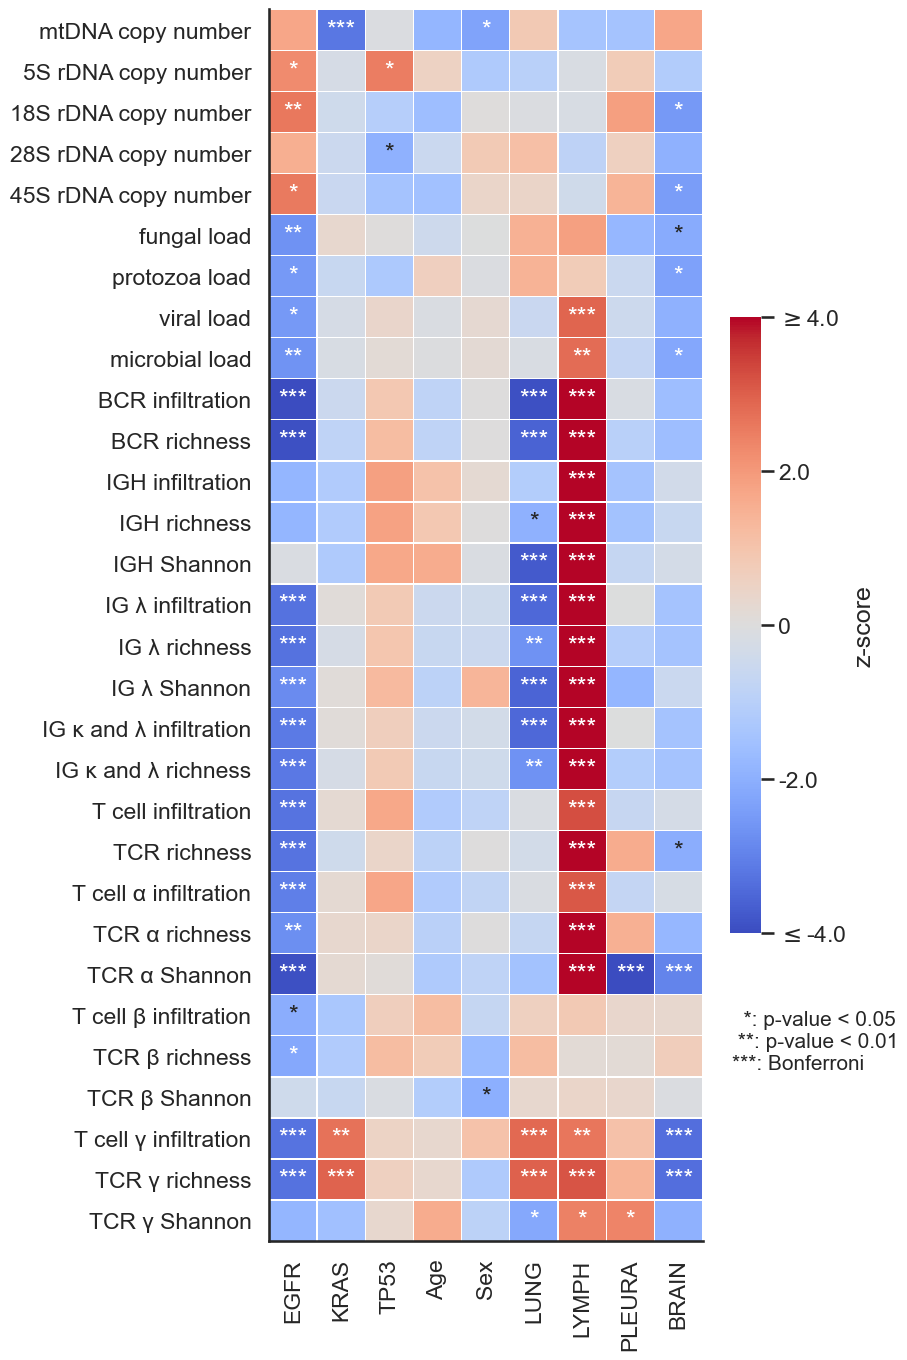

In [20]:
import seaborn as sns

plt.rcParams.update({'font.size': 12})

column_order = ['EGFR','KRAS','TP53','Age','Sex', "LUNG", "LYMPH","PLEURA","BRAIN"]

row_order = ['mtDNA copy number',
             '5S rDNA copy number','18S rDNA copy number','28S rDNA copy number','45S rDNA copy number',
             'fungal load','protozoa load','viral load','microbial load',
             'BCR infiltration','BCR richness','IGH infiltration','IGH richness','IGH Shannon',
             'IG λ infiltration','IG λ richness','IG λ Shannon','IG κ and λ infiltration',
             'IG κ and λ richness','T cell infiltration','TCR richness','T cell α infiltration',
             'TCR α richness','TCR α Shannon','T cell β infiltration','TCR β richness','TCR β Shannon',
             'T cell γ infiltration','TCR γ richness','TCR γ Shannon']

result = df.pivot(index='sbt_feature', columns='outcome', values='z').reindex(column_order, axis=1)
result = result.reindex(row_order, axis=0)

labels = df.pivot(index='sbt_feature', columns='outcome', values='label').reindex(column_order, axis=1)
labels = labels.reindex(row_order, axis=0)

sns.set_style("white")
sns.set_context("talk")

fig, ax = plt.subplots(1)
fig = plt.gcf()
fig.set_size_inches(7,16)

g=sns.heatmap(result, 
              cmap='coolwarm',
              linewidths=.2,
              annot=labels,
              fmt="",
              vmin=-4,
              vmax=4,
              cbar_kws={'label': 'z-score' , "shrink": 0.5},)

g.text(9.6, 25.8,'  *: p-value < 0.05\n **: p-value < 0.01\n***: Bonferroni', fontsize=15)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-4.0, -2., 0, 2., 4.0])
colorbar.set_ticklabels([r'$\leq$-4.0', '-2.0' ,'0', '2.0', r'$\geq$4.0'])

g.set(xlabel='', ylabel='')
sns.despine()

plt.savefig('../figures/Fig1_association_heatmap_op-luad.png', bbox_inches='tight')